# Ensemble Learning 3
***
지난 챕터에서는 앙상블 알고리즘중에서 부스팅 계열의 XGBoost에 대해서 알아보았습니다. 이번 챕터에서는 XGBoost와 함께 부스팅 알고리즘에서 각광을 받는 LightGBM에 대해 공부해보겠습니다. XGBoost는 GradientBoostingClassifier 보다는 수행 속도가 빠른 편이지만 다른 알고리즘과 비교했을 때는 여전히 느리다는 단점이 있습니다. 이러한 문제점을 보완하기 위한 알고리즘이 바로 LightGBM인데 말그대로 'Light'한 알고리즘입니다. XGBoost 보다 수행속도도 훨씬 빠르고 투입되는 컴퓨팅 자원(메모리 등)도 매우 적기 때문에 최근 정형 데이터 마이닝에서 널리 사용되고 있습니다.

LightGBM은 일반 부스팅 계열 알고리즘과 달리 '리프 중심 트리 분할' 방식을 사용합니다. 기존 방식은 '균형 트리 분할' 방식을 사용하는데 LightGBM은 손실 값이 높은(= 불순도가 높은) 리프 노드를 지속적으로 분할하면서 규칙 트리를 생성합니다. 이를 통해서 기존 방식 보다 예측 오류 손실을 최소화 할 수 있습니다.
***

In [16]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
import numpy as np
from IPython.display import Image

In [2]:
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = .2, random_state = 1214)

In [4]:
lgbm_clf = LGBMClassifier(random_state = 1214)

In [5]:
lgbm_clf.fit(X_train, y_train)

LGBMClassifier(random_state=1214)

In [7]:
pred = lgbm_clf.predict(X_test)

In [11]:
print(accuracy_score(y_test, pred))

0.956140350877193


LightGBM 또한 조기 중단 기능이 내재되어 있습니다. 

In [12]:
lgbm_clf = LGBMClassifier(random_state = 1214)

In [13]:
lgbm_clf.fit(X_train, y_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = [(X_test, y_test)])

[1]	valid_0's binary_logloss: 0.615519
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.558422
[3]	valid_0's binary_logloss: 0.505412
[4]	valid_0's binary_logloss: 0.454327
[5]	valid_0's binary_logloss: 0.415915
[6]	valid_0's binary_logloss: 0.386835
[7]	valid_0's binary_logloss: 0.353972
[8]	valid_0's binary_logloss: 0.326303
[9]	valid_0's binary_logloss: 0.305423
[10]	valid_0's binary_logloss: 0.283576
[11]	valid_0's binary_logloss: 0.26862
[12]	valid_0's binary_logloss: 0.250425
[13]	valid_0's binary_logloss: 0.23721
[14]	valid_0's binary_logloss: 0.22422
[15]	valid_0's binary_logloss: 0.210331
[16]	valid_0's binary_logloss: 0.202753
[17]	valid_0's binary_logloss: 0.193994
[18]	valid_0's binary_logloss: 0.186919
[19]	valid_0's binary_logloss: 0.176512
[20]	valid_0's binary_logloss: 0.169328
[21]	valid_0's binary_logloss: 0.159756
[22]	valid_0's binary_logloss: 0.154245
[23]	valid_0's binary_logloss: 0.150615
[24]	valid_0's binary_logloss:

LGBMClassifier(random_state=1214)

***
지금까지 결정트리, 앙상블 알고리즘에 대해 공부해보았는데요. 실제 ML 문제를 해결해보는 간단한 실습을 진행해보도록 하겠습니다.<br>
진행 process는 아래와 같습니다.
***

### 1. Load Data
### 2. Data Wrangling & EDA
### 3. Modeling & Evaluation
### 4. Submission<br>
***
절차대로 시작해보겠습니다. 먼저 데이터를 불러옵니다.

## 1. Load Data

In [260]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [226]:
df = pd.read_csv('C:/Users/ksh/kaggleDacon/Kaggle/chrun/Churn_Modelling.csv')

In [227]:
df.drop(['RowNumber', 'CustomerId'], axis = 1, inplace = True) 

데이터를 훈련용 데이터와 예측 평가 데이터로 나눕니다.

In [228]:
val_idx = list(df.loc[df.Exited == 0].sample(1600).index) + list(df.loc[df.Exited == 1].sample(400).index)
val_idx = set(val_idx)

In [229]:
train = df.query('index not in @val_idx')
test = df.query('index in @val_idx')

train.index = range(train.shape[0])
test.index = range(test.shape[0])

In [230]:
submission = pd.DataFrame(test.Exited)
test.drop('Exited', axis = 1, inplace = True)

In [231]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Surname          8000 non-null   object 
 1   CreditScore      8000 non-null   int64  
 2   Geography        8000 non-null   object 
 3   Gender           8000 non-null   object 
 4   Age              8000 non-null   int64  
 5   Tenure           8000 non-null   int64  
 6   Balance          8000 non-null   float64
 7   NumOfProducts    8000 non-null   int64  
 8   HasCrCard        8000 non-null   int64  
 9   IsActiveMember   8000 non-null   int64  
 10  EstimatedSalary  8000 non-null   float64
 11  Exited           8000 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 750.1+ KB


In [232]:
train.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
2,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
3,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
4,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [233]:
test.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
1,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
2,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
3,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
4,Goforth,616,Germany,Male,45,3,143129.41,2,0,1,64327.26


***

## 2. Data Wrangling & EDA

이제 데이터 전처리와 탐색적 데이터 분석을 해보도록 하곘습니다.<br>
이름에 해당하는 'Surname'은 모델링에 사용하기 어려우니 삭제하도록 하겠습니다.

In [234]:
train.drop('Surname', axis = 1, inplace = True)
test.drop('Surname', axis = 1, inplace = True)

In [235]:
train.Exited.value_counts()

0    6363
1    1637
Name: Exited, dtype: int64

우리가 예측해야할 변수인 Exited 변수의 클래스 비율은 위와 같습니다.

In [236]:
train.groupby('Geography').Exited.mean().reset_index(name = 'mean_Exited')

,Geography,mean_Exited
0,France,0.162061
1,Germany,0.325720
2,Spain,0.167598


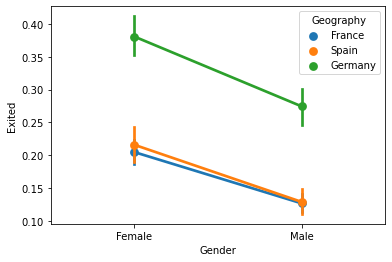

In [237]:
sns.pointplot(train.Gender, train.Exited, hue = 'Geography', data = train)
plt.show()

Geography와 성별에 따른 Exited의 분포를 확인해보니 모든 국가에서 여성이 더 파산확률이 높은 것을 알 수 있습니다.

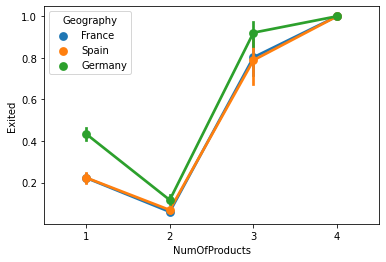

In [238]:
sns.pointplot(train.NumOfProducts, train.Exited, hue = 'Geography', data = train)
plt.show()

Geography 및 NumOfProducts에 따른 Exited의 분포를 확인해보니 모든 국가에서 3, 4개의 제품을 소유한 고객들의 파산확률이 더 높은 것을 알 수 있다.

train의 Gender 컬럼을 0과 1의 이진 변수로 변환해줍니다.

In [239]:
train.Gender = train.Gender.map({'Female' : 0, 'Male' : 1})
test.Gender = test.Gender.map({'Female' : 0, 'Male' : 1})

범주형 변수는 원-핫 인코딩 형태로 더미화 해준다.

In [240]:
train = pd.get_dummies(columns = ['Geography','NumOfProducts'], data = train)
test = pd.get_dummies(columns = ['Geography','NumOfProducts'], data = test)

***
## 3. Modeling & Evaluation

전처리가 끝난 데이터로 모델링을 해보도록 하겠습니다.

In [274]:
X = train.drop('Exited', axis = 1)
y = train.Exited

In [275]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1214)

In [276]:
model1 = GradientBoostingClassifier(random_state = 1214)
model2 = XGBClassifier(random_state = 1214)
model3 = LGBMClassifier(random_state = 1214)
model4 = RandomForestClassifier(random_state = 1214)

In [277]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)

RandomForestClassifier(random_state=1214)

### accuracy_score 확인

In [278]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = model4.predict(X_test)

In [279]:
acc1 = accuracy_score(y_test, pred1)
acc2 = accuracy_score(y_test, pred2)
acc3 = accuracy_score(y_test, pred3)
acc4 = accuracy_score(y_test, pred4)

In [280]:
print(f'{model1.__class__.__name__}의 accuracy는 {np.round(acc1, 4)}이다.')
print(f'{model2.__class__.__name__}의 accuracy는 {np.round(acc2, 4)}이다.')
print(f'{model3.__class__.__name__}의 accuracy는 {np.round(acc3, 4)}이다.')
print(f'{model4.__class__.__name__}의 accuracy는 {np.round(acc4, 4)}이다.')

GradientBoostingClassifier의 accuracy는 0.8712이다.
XGBClassifier의 accuracy는 0.8581이다.
LGBMClassifier의 accuracy는 0.8781이다.
RandomForestClassifier의 accuracy는 0.8694이다.


### roc_auc_score 확인

In [281]:
prob1 = model1.predict_proba(X_test)[:, 1]
prob2 = model2.predict_proba(X_test)[:, 1]
prob3 = model3.predict_proba(X_test)[:, 1]
prob4 = model4.predict_proba(X_test)[:, 1]

In [282]:
roc_auc1 = roc_auc_score(y_test, prob1)
roc_auc2 = roc_auc_score(y_test, prob2)
roc_auc3 = roc_auc_score(y_test, prob3)
roc_auc4 = roc_auc_score(y_test, prob4)

In [283]:
print(f'{model1.__class__.__name__}의 roc_auc는 {np.round(roc_auc1, 4)}이다.')
print(f'{model2.__class__.__name__}의 roc_auc는 {np.round(roc_auc2, 4)}이다.')
print(f'{model3.__class__.__name__}의 roc_auc는 {np.round(roc_auc3, 4)}이다.')
print(f'{model4.__class__.__name__}의 roc_auc는 {np.round(roc_auc4, 4)}이다.')

GradientBoostingClassifier의 roc_auc는 0.8718이다.
XGBClassifier의 roc_auc는 0.8633이다.
LGBMClassifier의 roc_auc는 0.872이다.
RandomForestClassifier의 roc_auc는 0.8615이다.


***

## 4. Submission

실제 예측해야할 데이터로 최종 예측후 submission의 정답과 비교해보도록 하겠습니다.
최종 예측을 할 때는 전체데이터로 학습을 한 후 진행해야 합니다.

In [284]:
model1.fit(X, y)
model2.fit(X, y)
model3.fit(X, y)
model4.fit(X, y)

RandomForestClassifier(random_state=1214)

In [285]:
sub_pred1 = model1.predict(test)
sub_pred2 = model2.predict(test)
sub_pred3 = model3.predict(test)
sub_pred4 = model4.predict(test)

In [286]:
print(f'{model1.__class__.__name__}의 최종 accuracy는 {np.round(accuracy_score(submission.Exited, sub_pred1), 4)}이다.')
print(f'{model2.__class__.__name__}의 최종 accuracy는 {np.round(accuracy_score(submission.Exited, sub_pred2), 4)}이다.')
print(f'{model3.__class__.__name__}의 최종 accuracy는 {np.round(accuracy_score(submission.Exited, sub_pred3), 4)}이다.')
print(f'{model4.__class__.__name__}의 최종 accuracy는 {np.round(accuracy_score(submission.Exited, sub_pred4), 4)}이다.')

GradientBoostingClassifier의 최종 accuracy는 0.866이다.
XGBClassifier의 최종 accuracy는 0.86이다.
LGBMClassifier의 최종 accuracy는 0.865이다.
RandomForestClassifier의 최종 accuracy는 0.8595이다.


앙상블 기법을 통해서 성능을 더 올려보도록 하겠습니다.

In [287]:
vot_clf = VotingClassifier(estimators = [('gbm', model1), ('xgb', model2), ('lgbm', model3), ('rf', model4)], voting = 'soft')

In [288]:
vot_clf.fit(X, y)

VotingClassifier(estimators=[('gbm',
                              GradientBoostingClassifier(random_state=1214)),
                             ('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=100, n_jobs=0,
                                            num_par

In [289]:
print(f'{model1.__class__.__name__}의 최종 accuracy는 {np.round(accuracy_score(submission.Exited, vot_clf.predict(test)), 4)}이다.')

GradientBoostingClassifier의 최종 accuracy는 0.868이다.


In [292]:
print(f'{model1.__class__.__name__}의 최종 accuracy는 {np.round(roc_auc_score(submission.Exited, vot_clf.predict_proba(test)[:, 1]), 4)}이다.')

GradientBoostingClassifier의 최종 accuracy는 0.8701이다.


정확도는 더 높아졌지만 roc_auc는 좀 더 낮아진 것을 알 수 있습니다.

In [293]:
pred = model1.predict_proba(test)[:, 1] * model2.predict_proba(test)[:, 1] * model3.predict_proba(test)[:, 1] * model4.predict_proba(test)[:, 1]

In [294]:
pred **= .25

In [298]:
pred = [1 if x > .5 else 0 for x in pred]

In [303]:
print(f'앙상블 기법의 최종 accuracy는 {np.round(accuracy_score(submission.Exited, pred), 4)}이다.')

앙상블 기법의 최종 accuracy는 0.8665이다.


지금까지 간단한 예제를 통해서 분류문제를 해결해보았습니다.<br>
실제 문제를 해결할 때 독립적인 모델들을 여러 개 사용하고 다양한 앙상블 기법활용은 물론 하이퍼 파라미터 튜닝 등 다양한 접근법을 통해서 모델의 성능을 올릴 수 있습니다.
***
다음 챕터에서는 예측 class의 불균형 분포를 가지는 데이터를 예측할 때 사용되는 기법에 대해서 알아보도록 하겠습니다. 감사합니다.